## Project: Wrangling and Analyzing Data (WeRateDogs)

### Data Gathering

#### Steps
- Import all required python libraries
- Read the twitter-archive-enhanced.csv into a dataframe 'twitter_archive'
- Use requests library to download the image_predictions.tsv file and load it into a dataframe named image_predictions
- Read the tweet_json.txt line by line and load it into a dataframe named tweet

1. Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from io import BytesIO

%matplotlib inline

2. Directly download the twitter-archive-enhanced file. Read it into a dataframe.

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


3. Download the image_predictions.tsv programmatically using Requests library
4. Read it into a dataframe

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join('image_predictions.tsv'), mode='wb') as file:
    file.write(response.content)

In [3]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


5. Read additional data from tweet-json

In [4]:
df = []
with open('tweet-json copy', 'r') as json_file:
    for line in json_file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})

In [5]:
twitter_add = pd.DataFrame(df, columns=['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

## Data Assessment 

The data will be assessed both visually and programmatically.


### Visual Assessment

In [6]:
#load twitter_archive and visually assess
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
#load image_predictions to visually assess it
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
#load twitter_add to visually assess it
twitter_add 

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


## Programmatic Assessment

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_archive['name'].isnull().sum()

0

In [11]:
twitter_archive['tweet_id'].duplicated().sum()

0

In [12]:
twitter_archive['name'].duplicated().sum()

1399

In [13]:
twitter_archive[twitter_archive['name'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
twitter_archive['expanded_urls'].duplicated().sum()

137

In [16]:
twitter_archive[twitter_archive['expanded_urls'].duplicated()].tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


In [17]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
twitter_add.head()

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


In [20]:
twitter_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   create_date     2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [21]:
#checking for duplicated columns by making a list of all the columns, tweet_id should be the only duplicate
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(twitter_add))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Quality Issues
#### twitter_archive
- The timestamp column and retweeted_status_timestamp are inputed as object. However, they should be in a datetime format
- Several columns have null values represented with None instead of NaN
- Name column has invalid names like 'None', 'a', 'quite', 'very'
- Duplicated rows of expanded_urls column
- Columns like tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are int/float but should be regarded as strings to avoid arithmetic calculation.
- The original tweets are the ones needed. The replies to status and retweets should be removed.
#### image_prediction
- The tweet id column is in integer
- Duplicated rows of jpg_url
- There are 2075 rows in this file and it is not up to the number of other files.
#### twitter_add (additional json file)
- create_date has an object datatype. It should be in datetime format

## Tidiness Issues
#### twitter_archive
- Drop columns with too many null values like 
- duggo, floofer, puppo, pupper columns should be merged under one column as dog stages
#### image_prediction
- The confidence level and breed predictions are in separate columns.
#### twitter_add (additional json file
- Tweet_id column is in twitter_archive

## Data Cleaning
- In this section, the quality and tidiness issues found during assessment will be dealt with and resolved.

In [22]:
#Make copies of the original data
twitter_archive_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
twitter_add_clean = twitter_add.copy()

## Issue No. 1: The timestamp columns in twitter_archive dataframe are in object instead of datetime.

### Define: Convert object datatype to datetime format

### Code

In [23]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_clean['retweeted_status_timestamp'])

### Test

In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Issue No 2: Null values are represented as None instead of NaN in some columns

### Define: Convert 'None' to NaN 

### Code

In [25]:
twitter_archive_clean['name'].replace('None', np.nan, inplace=True)
twitter_archive_clean['doggo'].replace('None', np.nan, inplace=True)
twitter_archive_clean['floofer'].replace('None', np.nan, inplace=True)
twitter_archive_clean['pupper'].replace('None', np.nan, inplace=True)
twitter_archive_clean['puppo'].replace('None', np.nan, inplace=True)

### Test

In [26]:
twitter_archive_clean['name'].isnull().sum()

745

## Issue No 3: Name column has invalid names

### Define: Write a code to get the unique values in the name column. Afterwards, Convert invalid names to NaN values.

### Code

In [27]:
name_list = twitter_archive_clean.name.unique().tolist()
name_list

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 'Qui

In [28]:
#from the unique list above: 'a', 'an', 'O', 'by','Q','very','one','not','quite'are the invalid names that need to be converted to Nan
twitter_archive_clean['name'].replace('a', np.NaN, inplace=True)
twitter_archive_clean['name'].replace('an', np.NaN, inplace=True)
twitter_archive_clean['name'].replace('by', np.NaN, inplace=True)
twitter_archive_clean['name'].replace('O', np.NaN, inplace=True)
twitter_archive_clean['name'].replace('very', np.NaN, inplace=True)
twitter_archive_clean['name'].replace('one', np.NaN, inplace=True)
twitter_archive_clean['name'].replace('quite', np.NaN, inplace=True)
twitter_archive_clean['name'].replace('Q', np.NaN, inplace=True)

### Test

In [29]:
twitter_archive_clean['name'].value_counts()

Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
              ..
Dex            1
Ace            1
Tayzie         1
Grizzie        1
Christoper     1
Name: name, Length: 949, dtype: int64

## Issue No 4:  Rows with duplicated expanded urls

### Define: Drop the duplicate rows

### Code

In [30]:
twitter_archive_clean.drop_duplicates(subset='expanded_urls', inplace=True)

### Test

In [31]:
twitter_archive_clean['expanded_urls'].duplicated().sum()

0

## Issue No 5:Columns like tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are int/float but should be regarded as strings to avoid arithmetic calculation.

### Define: Change the datatypes of these columns into strings

### Code

In [32]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(object)
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype(object)
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype(object)
twitter_archive_clean['retweeted_status_id'] = twitter_archive_clean['retweeted_status_id'].astype(object)
twitter_archive_clean['retweeted_status_user_id'] = twitter_archive_clean['retweeted_status_user_id'].astype(object)

### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2219 non-null   object             
 1   in_reply_to_status_id       24 non-null     object             
 2   in_reply_to_user_id         24 non-null     object             
 3   timestamp                   2219 non-null   datetime64[ns, UTC]
 4   source                      2219 non-null   object             
 5   text                        2219 non-null   object             
 6   retweeted_status_id         180 non-null    object             
 7   retweeted_status_user_id    180 non-null    object             
 8   retweeted_status_timestamp  180 non-null    datetime64[ns, UTC]
 9   expanded_urls               2218 non-null   object             
 10  rating_numerator            2219 non-null   int64           

## Issue No 6: Tweet_id columns in the remaining two dataframes are integers

### Define: Convert the datatype of the tweet_id to string.

### Code

In [34]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype(object)
twitter_add_clean['tweet_id'] = twitter_add_clean['tweet_id'].astype(object)

### Test

In [35]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [36]:
twitter_add_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   create_date     2354 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


## Issue No 7: The Create_date column in twitter_add dataframe is in string datatype.

### Define: Convert the create_date column to datetime data type

### Code

In [37]:
twitter_add_clean['create_date'] = pd.to_datetime(twitter_add_clean['create_date'])

### Test

In [38]:
twitter_add_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2354 non-null   object             
 1   retweet_count   2354 non-null   int64              
 2   favorite_count  2354 non-null   int64              
 3   create_date     2354 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 73.7+ KB


## Issue No 8: Duplicated rows of jpg_url image_clean dataframe

### Define: Drop the duplicated rows of jpg_url

### Code

In [39]:
image_clean.drop_duplicates(subset='jpg_url', inplace=True)

### Test

In [40]:
image_clean.duplicated().sum()

0

## Issue No 9: Doggo, Puppo, Pupper, Floofer are in different columns.

### Define: Melt Doggo, Puppo, Pupper and Floofer under the Dog_stages column and change the datatype into category.

### Code

In [41]:
print(twitter_archive_clean.doggo.value_counts())
print(twitter_archive_clean.floofer.value_counts())
print(twitter_archive_clean.pupper.value_counts())
print(twitter_archive_clean.puppo.value_counts())

doggo    90
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    244
Name: pupper, dtype: int64
puppo    26
Name: puppo, dtype: int64


In [42]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','name', 'expanded_urls', 'rating_numerator', 'rating_denominator'], var_name='dog_stages', value_name='stage')
twitter_archive_clean = twitter_archive_clean.drop('dog_stages', axis=1)


In [43]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,expanded_urls,rating_numerator,rating_denominator,stage
461,811744202451197953,NaN,NaN,2016-12-22 01:24:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Halo. She likes watermelon. 13/10 http...,NaN,NaN,NaT,Halo,https://twitter.com/dog_rates/status/811744202...,13,10,NaN
4754,831309418084069378,NaN,NaN,2017-02-14 01:09:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter and his son Montoya. Scooter ...,NaN,NaN,NaT,Scooter,https://twitter.com/dog_rates/status/831309418...,12,10,NaN
3011,761599872357261312,NaN,NaN,2016-08-05 16:28:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Sephie. According to this picture, she...",NaN,NaN,NaT,Sephie,https://twitter.com/dog_rates/status/761599872...,11,10,NaN
2492,836397794269200385,NaN,NaN,2017-02-28 02:09:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Buddy. He ran into a gl...,817827839487737856.0,4196983835.0,2017-01-07 20:18:46+00:00,Buddy,https://twitter.com/dog_rates/status/817827839...,13,10,NaN
3017,760893934457552897,NaN,NaN,2016-08-03 17:43:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wishes. He has the day off. Daily stru...,NaN,NaN,NaT,Wishes,https://twitter.com/dog_rates/status/760893934...,11,10,NaN


In [44]:
#Remove duplicates that must have been caused by the 'dog_stages' formed during melting
twitter_archive_clean = twitter_archive_clean.sort_values('stage').drop_duplicates('tweet_id', keep = 'first')
print(twitter_archive_clean.stage.value_counts())

pupper     232
doggo       90
puppo       25
floofer      9
Name: stage, dtype: int64


### Code

In [45]:
#convert the stage column to a category datatype
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].astype('category')

### Test

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 9 to 2218
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2219 non-null   object             
 1   in_reply_to_status_id       24 non-null     object             
 2   in_reply_to_user_id         24 non-null     object             
 3   timestamp                   2219 non-null   datetime64[ns, UTC]
 4   source                      2219 non-null   object             
 5   text                        2219 non-null   object             
 6   retweeted_status_id         180 non-null    object             
 7   retweeted_status_user_id    180 non-null    object             
 8   retweeted_status_timestamp  180 non-null    datetime64[ns, UTC]
 9   name                        1475 non-null   object             
 10  expanded_urls               2218 non-null   object          

## Issue No 10: Original tweets, Replies to status and retweets are all together in the dataframe. 

### Define: Keep rows that do not have replies to status and retweets.

### Code

In [47]:
#keep rows without replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_user_id.isnull()]

In [48]:
#keep rows without retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

In [49]:
#drop the columns
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 9 to 2218
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2015 non-null   object             
 1   timestamp           2015 non-null   datetime64[ns, UTC]
 2   source              2015 non-null   object             
 3   text                2015 non-null   object             
 4   name                1361 non-null   object             
 5   expanded_urls       2015 non-null   object             
 6   rating_numerator    2015 non-null   int64              
 7   rating_denominator  2015 non-null   int64              
 8   stage               317 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 143.8+ KB


## Issue No 11: In the image_clean dataframe, the confidence levels, dog tests and breed predictions are in separate columns.

### Define: The predicted breeds and confidence levels will be sorted into two columns. 

### Code

In [51]:
#conditions for selection that it is a dog
conditions = [(image_clean['p1_dog'] == True), (image_clean['p2_dog'] == True), (image_clean['p3_dog'] == True)]

#the choice order for the conditions set above
breeds = [image_clean['p1'], image_clean['p2'], image_clean['p3']]

#the choice order for the confidence levels according to the conditions set above
confidence = [image_clean['p1_conf'], image_clean['p2_conf'], image_clean['p3_conf']]

#select predicted breed based on the first successful condition
image_clean['predicted_breed'] = np.select(conditions, breeds, default='None')

#select confidence level based on the first successful condition
image_clean['confidence_level'] = np.select(conditions, confidence, default= 0)



In [52]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predicted_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [53]:
# drop the previous prediction and confidence level columns
image_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

### Test

In [54]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2009 non-null   object 
 1   jpg_url           2009 non-null   object 
 2   img_num           2009 non-null   int64  
 3   predicted_breed   2009 non-null   object 
 4   confidence_level  2009 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


In [56]:
#replace 'None' in predicted breed column to NaN 
image_clean['predicted_breed'].replace('None', np.NaN, inplace=True)

In [61]:
#Drop the null values
image_clean['predicted_breed'].dropna(inplace=True)
image_clean.dropna(inplace=True)

In [62]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1691 non-null   int64  
 1   jpg_url           1691 non-null   object 
 2   img_num           1691 non-null   int64  
 3   predicted_breed   1691 non-null   object 
 4   confidence_level  1691 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 79.3+ KB


## Issue No 12: The timestamp in twitter_archive_clean dataframe is the same as the create_date in twitter_add_clean dataframe.

### Define: Drop create_date column in twitter_add_clean dataframe

### Code

In [64]:
#drop the create_date column in twitter_add_clean
twitter_add_clean.drop('create_date', axis=1, inplace=True)

### Test

In [65]:
twitter_add_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Issue No 13: All the dataframes should be one

### Define: Merge the three dataframes into one using the tweet_id

### Code

In [66]:
#merge the dataframes
Twitter_archive_clean = pd.merge(pd.merge(twitter_archive_clean, image_clean, how='inner', on='tweet_id'), twitter_add_clean, how='inner', on='tweet_id')


In [67]:
#clean source
Twitter_archive_clean['source'] = Twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<',x)[0])

In [68]:
#create rating column
Twitter_archive_clean['rating'] = Twitter_archive_clean['rating_numerator'].astype(str) + '/'+ Twitter_archive_clean['rating_denominator'].astype(str)

In [69]:
#drop columns
Twitter_archive_clean.drop(['rating_numerator', 'rating_denominator', 'expanded_urls'], axis=1, inplace=True)

In [70]:
#drop duplicates
Twitter_archive_clean = Twitter_archive_clean.drop_duplicates()

### Test

In [71]:
Twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,name,stage,jpg_url,img_num,predicted_breed,confidence_level,retweet_count,favorite_count,rating
548,793962221541933056,2016-11-02 23:45:19+00:00,Twitter for iPhone,This is Maximus. His face is stuck like that. ...,Maximus,NaN,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,5711,18910,12/10
693,759557299618865152,2016-07-31 01:12:26+00:00,Twitter for iPhone,This is Emma. She can't believe her last guess...,Emma,NaN,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,2,golden_retriever,0.763333,1341,5202,10/10
441,826240494070030336,2017-01-31 01:27:39+00:00,Twitter for iPhone,We only rate dogs. Please don't send in any mo...,NaN,NaN,https://pbs.twimg.com/media/C3dlVMbXAAUd-Gh.jpg,1,French_bulldog,0.903048,2965,14614,11/10
552,793286476301799424,2016-11-01 03:00:09+00:00,Twitter for iPhone,This is Moreton. He's the Good Boy Who Lived. ...,Moreton,NaN,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,10723,27597,13/10
725,751598357617971201,2016-07-09 02:06:27+00:00,Twitter for iPhone,This is Toby. A cat got his tongue. 13/10 ador...,Toby,NaN,https://pbs.twimg.com/media/Cm42t5vXEAAv4CS.jpg,1,toy_poodle,0.757756,3440,8699,13/10


In [72]:
Twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 0 to 1597
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1598 non-null   object             
 1   timestamp         1598 non-null   datetime64[ns, UTC]
 2   source            1598 non-null   object             
 3   text              1598 non-null   object             
 4   name              1156 non-null   object             
 5   stage             243 non-null    category           
 6   jpg_url           1598 non-null   object             
 7   img_num           1598 non-null   int64              
 8   predicted_breed   1598 non-null   object             
 9   confidence_level  1598 non-null   float64            
 10  retweet_count     1598 non-null   int64              
 11  favorite_count    1598 non-null   int64              
 12  rating            1598 non-null   object             
dtypes: 

In [73]:
Twitter_archive_clean.duplicated().sum()

0

### Storing Data

In [74]:
Twitter_archive_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data

In this section, there will be analysis of the cleaned dataset.

In [104]:
#copy the dataframe
twitter_master = Twitter_archive_clean.copy()
twitter_master.head()

,tweet_id,timestamp,source,text,name,stage,jpg_url,img_num,predicted_breed,confidence_level,retweet_count,favorite_count,rating
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,7711,32467,14/10
1,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,doggo,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,2173,6620,12/10
2,760893934457552897,2016-08-03 17:43:45+00:00,Twitter for iPhone,This is Wishes. He has the day off. Daily stru...,Wishes,doggo,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim_spaniel,0.113992,1104,4228,11/10
3,775364825476165632,2016-09-12 16:05:54+00:00,Twitter for iPhone,This is Finley. He's an independent doggo stil...,Finley,doggo,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,3472,8295,11/10
4,782747134529531904,2016-10-03 01:00:34+00:00,Twitter for iPhone,This is Deacon. He's the happiest almost dry d...,Deacon,doggo,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,golden_retriever,0.560699,1604,8310,11/10


In [84]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 0 to 1597
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1598 non-null   object             
 1   timestamp         1598 non-null   datetime64[ns, UTC]
 2   source            1598 non-null   object             
 3   text              1598 non-null   object             
 4   name              1156 non-null   object             
 5   stage             243 non-null    category           
 6   jpg_url           1598 non-null   object             
 7   img_num           1598 non-null   int64              
 8   predicted_breed   1598 non-null   object             
 9   confidence_level  1598 non-null   float64            
 10  retweet_count     1598 non-null   int64              
 11  favorite_count    1598 non-null   int64              
 12  rating            1598 non-null   object             
dtypes: 

## Insights

1. The most common dog breed
2. The most common dog stage
3. Ten most common dog names
4. What dog stage has the highest average retweet count?
5. What dog stage has the highest average favorite count?
6. The most common tweet source

In [85]:
twitter_master.describe()

,img_num,confidence_level,retweet_count,favorite_count
count,1598.000000,1598.000000,1598.000000,1598.000000
mean,1.210263,0.549374,2613.383605,8725.171464
std,0.566963,0.299011,4494.554560,12031.257440
min,1.000000,0.000010,16.000000,81.000000
25%,1.000000,0.303579,620.250000,2086.500000
50%,1.000000,0.550914,1366.500000,4145.500000
75%,1.000000,0.820643,3041.500000,10998.000000
max,4.000000,0.999956,79515.000000,132810.000000


1. The most common dog breed?

In [87]:
twitter_master.predicted_breed.value_counts().head(5)

golden_retriever      148
Labrador_retriever    101
Pembroke               91
Chihuahua              88
pug                    62
Name: predicted_breed, dtype: int64

The most popular dog breed is golden retriever.

2. The most common dog stage?

In [88]:
twitter_master.stage.value_counts()

pupper     156
doggo       61
puppo       19
floofer      7
Name: stage, dtype: int64

The most popular dog stage is pupper.

3. The most common dog names? Top 10

In [90]:
twitter_master.name.value_counts().head(10)

Lucy       10
Tucker      9
Charlie     9
Cooper      9
Oliver      8
Penny       8
Sadie       7
Daisy       7
the         7
Winston     6
Name: name, dtype: int64

These are the most common names given to dogs

4. What dog stage has the highest average retweet count?

In [92]:
twitter_master.groupby('stage')['retweet_count'].mean().sort_values(ascending=False)

stage
puppo      6896.789474
doggo      6190.967213
floofer    4968.714286
pupper     2105.211538
Name: retweet_count, dtype: float64

The puppo stage has the highest average retweet count

5. What dog stage has the highest average favorite count?

In [93]:
twitter_master.groupby('stage')['favorite_count'].mean().sort_values(ascending=False)

stage
puppo      23035.105263
doggo      18296.278689
floofer    13206.000000
pupper      6500.166667
Name: favorite_count, dtype: float64

The puppo stage has the highest average favorite count

6. The most common tweet source?

In [94]:
twitter_master.source.value_counts()

Twitter for iPhone    1568
Twitter Web Client      22
TweetDeck                8
Name: source, dtype: int64

iPhone is the most common tweet source

## Visualization

### Top Five Dog Breeds by Favorite Count

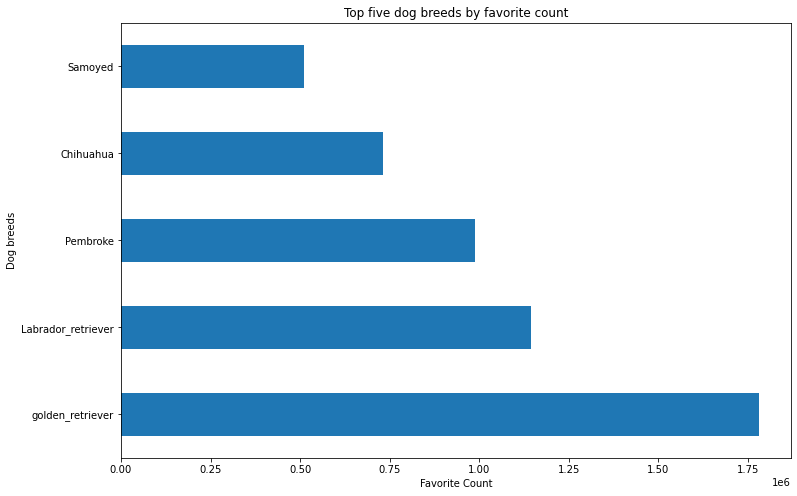

In [95]:
#visulaize the top five dog breeds by favorite count
top_breed = twitter_master.groupby('predicted_breed')['favorite_count'].sum().sort_values(ascending=False).nlargest(5)
top_breed.plot(kind='barh', title='Top five dog breeds by favorite count', figsize=(12,8))
plt.xlabel('Favorite Count')
plt.ylabel('Dog breeds');

### Dog Stages by Average Favorite Count

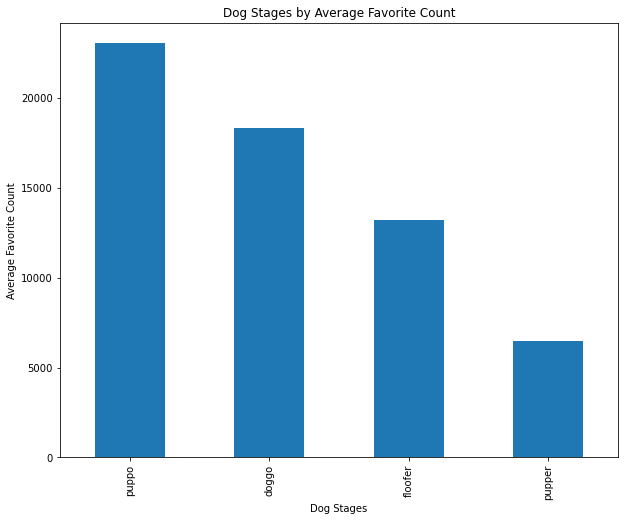

In [97]:
stages_fc = twitter_master.groupby('stage')['favorite_count'].mean().sort_values(ascending=False)
stages_fc.plot(kind='bar', title='Dog Stages by Average Favorite Count', figsize=(10,8))
plt.xlabel('Dog Stages')
plt.ylabel('Average Favorite Count');

### Correlation Heatmap

In [100]:
twitter_master.corr()

,img_num,confidence_level,retweet_count,favorite_count
img_num,1.000000,0.141054,0.101673,0.132720
confidence_level,0.141054,1.000000,0.022872,0.055047
retweet_count,0.101673,0.022872,1.000000,0.914439
favorite_count,0.132720,0.055047,0.914439,1.000000


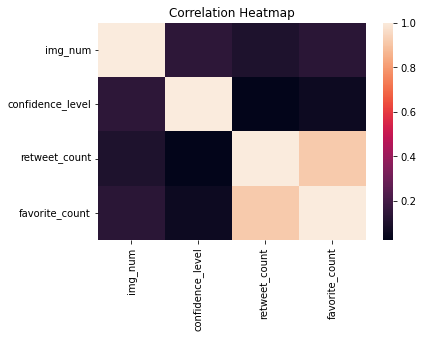

In [103]:
sns.heatmap(twitter_master.corr()).set_title('Correlation Heatmap');

The image above shows that there is a high correlation between retweet_count and favorite_count.